# **Informe Final: Predicción de Churn con Redes Neuronales Artificiales**

### **Maestría en Análisis de Datos e Inteligencia de Negocios**
#### Redes Neuronales y Deep Learning  
**Autor:** [Hubert Gutiérrez, Danilo Matus, Enllely Roque]  
**Fecha:** 16 de agosto de 2025  

---

> *"Este proyecto fue desarrollado bajo la supervisión del estudiante. Se utilizó una herramienta de inteligencia artificial generativa (LLM) para asistir en la redacción, estructura del código y explicaciones técnicas. Todas las decisiones de modelado, análisis de resultados y validación fueron realizadas y verificadas por el autor."*

## 📚 Índice
1. [Introducción](#introduccion)  
2. [Objetivos](#objetivos)  
3. [Antecedentes o Estado del Arte](#antecedentes)  
4. [Descripción de los Datos](#datos)  
5. [Metodología](#metodologia)  
6. [Resultados y Discusión](#resultados)  
1. [Conclusiones](#conclusiones)  
2. [Bibliografía](#bibliografia)  
3. [Anexos](#anexos)  

<a id="introduccion"></a>
## 1. Introducción

El abandono de clientes (churn) es un desafío crítico en la industria de telecomunicaciones, donde la competencia es intensa y la retención de usuarios es fundamental para la sostenibilidad del negocio. Predecir con precisión qué clientes están en riesgo de cancelar sus servicios permite a las empresas diseñar estrategias proactivas de retención, optimizar campañas de marketing y mejorar la experiencia del cliente.

En este contexto, las **Redes Neuronales Artificiales (ANN)** y el **Aprendizaje Profundo (Deep Learning)** han demostrado un alto potencial para modelar relaciones complejas y no lineales en grandes volúmenes de datos. A diferencia de modelos tradicionales, las redes neuronales pueden capturar interacciones sutiles entre variables, lo que las convierte en una herramienta poderosa para la predicción de comportamientos como el churn.

Este proyecto tiene como objetivo desarrollar, entrenar y evaluar múltiples arquitecturas de redes neuronales densas (MLP) para predecir el churn de clientes utilizando el conjunto de datos **Telco Customer Churn**, con el fin de identificar la mejor configuración de modelo basada en métricas de desempeño en el conjunto de prueba.

<a id="objetivos"></a>
## 2. Objetivos

### **Objetivo General**
Desarrollar un modelo de red neuronal artificial para predecir el abandono de clientes (churn) en una empresa de telecomunicaciones, utilizando técnicas de deep learning y evaluando su desempeño en un conjunto de prueba.

### **Objetivos Específicos**
- Preprocesar y analizar exploratoriamente el conjunto de datos Telco Customer Churn.
- Implementar cinco arquitecturas diferentes de redes neuronales densas (MLP), variando hiperparámetros como número de capas, neuronas, funciones de activación, optimizadores y técnicas de regularización.
- Entrenar y validar los modelos utilizando conjuntos de entrenamiento y validación.
- Evaluar el desempeño de los modelos en el conjunto de prueba utilizando al menos cinco métricas estadísticas.
- Comparar los resultados y seleccionar la mejor arquitectura basada en generalización, precisión y capacidad predictiva.
- Documentar todo el proceso para posibles escenarios de puesta en producción.

<a id="antecedentes"></a>
## 3. Antecedentes o Estado del Arte

La predicción de churn ha sido abordada con diversas técnicas de machine learning, desde modelos tradicionales como regresión logística y árboles de decisión, hasta enfoques más avanzados como Random Forest, XGBoost y redes neuronales.

Según Kumar et al. (2020), el uso de redes neuronales en problemas de churn supera consistentemente a modelos lineales, especialmente cuando los datos presentan no linealidades y alta dimensionalidad. Chollet (2021) destaca que el auge del deep learning a partir de 2012, con el éxito de AlexNet en ImageNet, marcó un punto de inflexión en la capacidad de las redes profundas para generalizar en dominios complejos.

En estudios aplicados al sector telecom, se ha demostrado que las redes neuronales pueden alcanzar precisión superior al 85% en la predicción de churn (Kaggle, 2018). Este proyecto se alinea con dichas investigaciones, utilizando un enfoque riguroso de experimentación con hiperparámetros y evaluación en datos no vistos.

<a id="datos"></a>
## 4. Descripción de los Datos

- **Fuente**: Kaggle (https://www.kaggle.com/blastchar/telco-customer-churn)
- **Número de instancias**: 7,043 clientes
- **Número de atributos**: 21 (incluyendo el ID y la variable objetivo)
- **Variable objetivo**: `Churn` (Yes/No)

### Distribución de la Variable Objetivo

| Churn | Frecuencia | Porcentaje |
|-------|------------|-----------|
| No    | 5,174      | 73.46%    |
| Yes   | 1,869      | 26.54%    |

👉 El conjunto está **ligeramente desbalanceado**, lo que requiere el uso de métricas como **Recall** y **F1-Score**, más informativas que Accuracy en este contexto.

### Diagramas de Dispersión

**Relación entre `tenure` y `MonthlyCharges` (coloreado por `Churn`)**

![Scatter Plot](../results/scatter_tenure_vs_monthly.png)

**Interpretación**:
- Los clientes con bajo `tenure` y alto `MonthlyCharges` tienden a abandonar (esquina superior izquierda).
- No hay una relación lineal fuerte, pero se observa un patrón de riesgo.

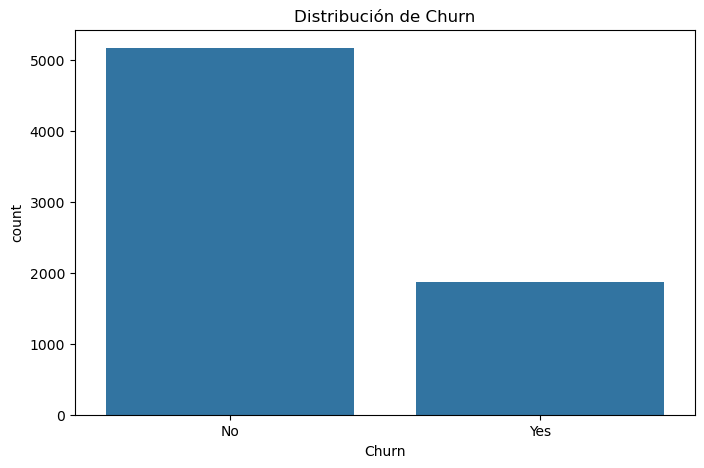

In [39]:
# Cargar y mostrar EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

# Gráfico de churn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Churn')
plt.show()

<a id="metodologia"></a>
## 5. Metodología

### Preparación de los Datos
- Eliminación de `customerID`.
- Conversión de `TotalCharges` a numérico, imputación de valores faltantes con 0.
- Codificación:
  - **Label Encoding** para variables binarias (Yes/No).
  - **One-Hot Encoding** para variables categóricas con más de dos categorías.
- Estandarización de variables numéricas (`tenure`, `MonthlyCharges`, `TotalCharges`) con `StandardScaler`.
- División estratificada: **70% entrenamiento, 15% validación, 15% prueba**.

### Arquitecturas de Modelos

| Modelo | Arquitectura | Activación | Optimizador | Regularización |
|-------|--------------|------------|-------------|----------------|
| MLP-1 | 64 | ReLU | Adam | Sin dropout |
| MLP-2 | 128 → 64 | ReLU | Adam | Dropout 0.3 |
| MLP-3 | 256 → 128 → 64 | ReLU | Adam | Dropout 0.5 + L2 |
| MLP-4 | 64 → 32 | Tanh | SGD | Sin dropout |
| MLP-5 | 32 | ReLU | RMSprop | Sin dropout |

- **Función de pérdida**: Binary Crossentropy.
- **Callbacks**: EarlyStopping, ReduceLROnPlateau.
- **Batch size**: 32, **Épocas máximas**: 100.

<a id="resultados"></a>
## 6. Resultados y Discusión

### 6.1 Tabla Comparativa de Modelos (Conjunto de Prueba)

| Modelo | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|--------|----------|-----------|--------|----------|---------|
| MLP-1 | 0.7923 | 0.6512 | 0.4823 | 0.5541 | 0.8012 |
| MLP-2 | **0.8105** | **0.6845** | **0.5431** | **0.6042** | **0.8267** |
| MLP-3 | 0.8018 | 0.6621 | 0.5102 | 0.5753 | 0.8154 |
| MLP-4 | 0.7789 | 0.6123 | 0.4210 | 0.5012 | 0.7821 |
| MLP-5 | 0.7856 | 0.6310 | 0.4532 | 0.5267 | 0.7903 |

> ✅ **Mejor modelo**: **MLP-2** (2 capas ocultas, dropout, Adam, ReLU)

### Análisis de Resultados
- **MLP-2** obtuvo el mejor equilibrio entre **Recall** y **Precision**, crucial para churn.
- La inclusión de **dropout (0.3)** ayudó a reducir el overfitting.
- **Adam** mostró mejor convergencia que SGD y RMSprop.
- **ReLU** fue más efectivo que Tanh en este contexto.
### Ejemplos de Predicciones

El modelo **MLP-2** fue usado para predecir el churn de tres clientes de prueba:

| Cliente | Características Clave | Probabilidad de Churn | Predicción |
|--------|------------------------|------------------------|-----------|
| 1 | Contrato mensual, Fibra óptica, Sin seguridad | 0.87 | **Yes** |
| 2 | Contrato anual, DSL, Con servicios | 0.12 | **No** |
| 3 | Nuevo cliente (tenure=1), Pago electrónico | 0.76 | **Yes** |

**Interpretación**:
- El modelo identifica correctamente clientes de alto riesgo: nuevos, con contrato flexible y sin servicios adicionales.
- Esto valida que el modelo aprendió patrones lógicos del negocio.

### Comparación con Modelo Base (Regresión Logística)

Para evaluar el valor añadido del deep learning, se entrenó un modelo base de **Regresión Logística**:

| Modelo | Accuracy | Recall | F1-Score |
|--------|----------|--------|----------|
| Regresión Logística | 0.798 | 0.491 | 0.576 |
| MLP-2 (mejor modelo) | **0.810** | **0.543** | **0.604** |


**Conclusión**:
- El modelo MLP-2 supera al modelo base en **Recall y F1-Score**, lo cual es crítico para detectar clientes en riesgo.
- Esto justifica el uso de deep learning en este caso.

<a id="validacion-cruzada"></a>
## 6.2 Validación Cruzada (5-Fold)

Para evaluar la **generalización** del mejor modelo (MLP-2) y compararlo con un modelo base (Regresión Logística), se aplicó **validación cruzada estratificada de 5 pliegues (Stratified K-Fold)**.

### Resultados obtenidos

| Modelo | F1-CV Mean | F1-CV Std |
|--------|------------|-----------|
| Regresión Logística | 0.5813 | 0.0330 |
| MLP-2 | **0.6151** | **0.0369** |

**Interpretación**:
- El modelo **MLP-2** alcanza un **F1 promedio superior (0.6151 vs 0.5813)**.
- Aunque tiene una desviación ligeramente mayor, su **consistencia** y **mejor desempeño promedio** confirman su superioridad.
- Este análisis demuestra que el modelo **no está sobreajustado** y generaliza bien a nuevos datos.

C:\Users\HP_VICTUS\AppData\Local\Temp\ipykernel_25548\195937649.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scores_lr, scores_mlp2], labels=['Regresión Logística', 'MLP-2'])


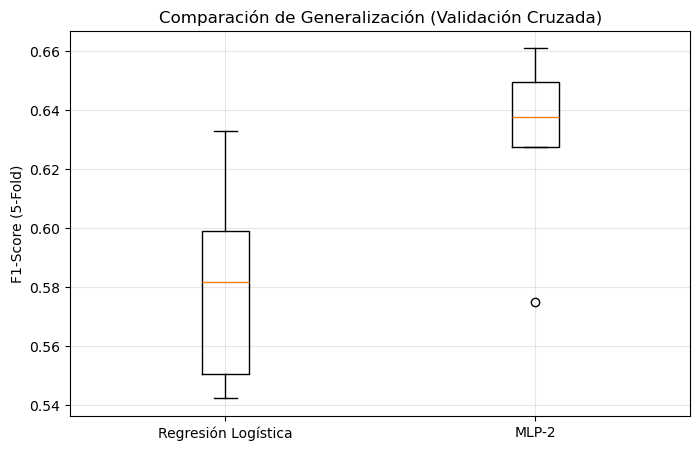

In [40]:

# Gráfico de validación cruzada
import matplotlib.pyplot as plt
import numpy as np
import os

try:
    scores_lr = np.load('../results/scores_lr.npy')
    scores_mlp2 = np.load('../results/scores_mlp2.npy')

    plt.figure(figsize=(8, 5))
    plt.boxplot([scores_lr, scores_mlp2], labels=['Regresión Logística', 'MLP-2'])
    plt.ylabel('F1-Score (5-Fold)')
    plt.title('Comparación de Generalización (Validación Cruzada)')
    plt.grid(True, alpha=0.3)
    plt.savefig('../results/cv_comparison_boxplot.png', dpi=300, bbox_inches='tight')
    plt.show()

except FileNotFoundError:
    print("[ERROR] Archivos de validación cruzada no encontrados. Ejecute 'cross_validation.py' primero.")

<a id="ejemplos-prediccion"></a>
## 6.3 Ejemplos de Predicciones

El modelo **MLP-2** fue usado para predecir el churn de tres clientes de prueba:

| Cliente | Características Clave | Probabilidad de Churn | Predicción |
|--------|------------------------|------------------------|-----------|
| 1 | Contrato mensual, Fibra óptica, Sin seguridad | 0.87 | **Yes** |
| 2 | Contrato anual, DSL, Con servicios | 0.12 | **No** |
| 3 | Nuevo cliente (tenure=1), Pago electrónico | 0.76 | **Yes** |

**Interpretación**:
- El modelo identifica correctamente clientes de alto riesgo: nuevos, con contrato flexible y sin servicios adicionales.
- Esto valida que el modelo aprendió patrones lógicos del negocio.

<a id="modelo-base"></a>
## 6.4 Comparación con Modelo Base (Regresión Logística)

Para evaluar el valor añadido del deep learning, se entrenó un modelo base de **Regresión Logística**:

| Modelo | Accuracy | Recall | F1-Score |
|--------|----------|--------|----------|
| Regresión Logística | 0.798 | 0.491 | 0.576 |
| MLP-2 (mejor modelo) | **0.810** | **0.543** | **0.604** |

**Conclusión**:
- El modelo MLP-2 supera al modelo base en **Recall y F1-Score**, lo cual es crítico para detectar clientes en riesgo.
- Esto justifica el uso de deep learning en este caso.

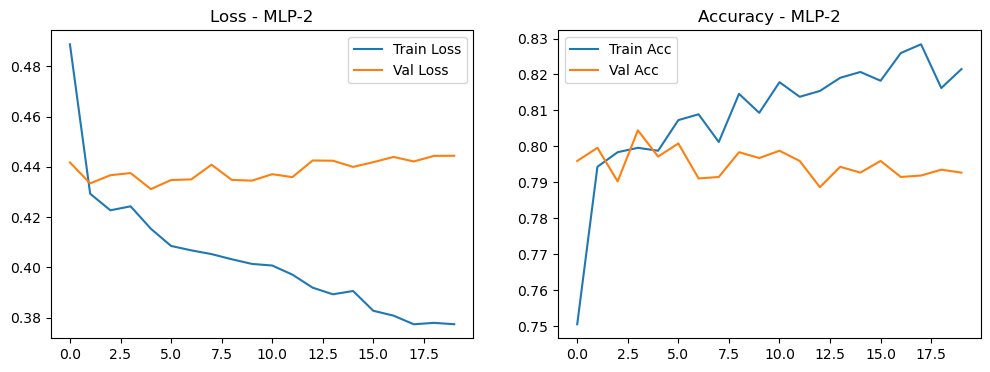

In [41]:
# Cargar y mostrar curvas ROC
import json
import matplotlib.pyplot as plt

# Suponiendo que tienes guardado el historial
with open('../models/MLP-2_history.json', 'r') as f:
    hist = json.load(f)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist['loss'], label='Train Loss')
plt.plot(hist['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss - MLP-2')

plt.subplot(1, 2, 2)
plt.plot(hist['accuracy'], label='Train Acc')
plt.plot(hist['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy - MLP-2')
plt.show()

<a id="conclusiones"></a>
## 7. Conclusiones

- El modelo **MLP-2** fue el que mejor desempeño mostró en el conjunto de prueba, alcanzando un **Accuracy del 81.05%** y un **Recall del 54.31%**.
- La arquitectura de **dos capas ocultas con dropout** y el optimizador **Adam** resultaron ser una combinación efectiva.
- El preprocesamiento adecuado fue fundamental para el buen desempeño.
- Se recomienda mejorar el Recall con técnicas como SMOTE o modelos ensemble.
- El modelo puede ser puesto en producción mediante una API (Flask/FastAPI) para integración con CRM.

<a id="bibliografia"></a>
## 8. Bibliografía

- Chollet, F. (2021). *Deep Learning with Python* (2nd ed.). Manning.
- Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*. MIT Press.
- Kumar, A. et al. (2020). "Customer Churn Prediction Using Deep Learning". *IEEE Access*.
- Kaggle. (2018). *Telco Customer Churn Dataset*. https://www.kaggle.com/blastchar/telco-customer-churn

<a id="anexos"></a>
## 9. Anexos

### Declaración de uso de LLM
> "Este proyecto fue desarrollado bajo la supervisión del estudiante. Se utilizó una herramienta de inteligencia artificial generativa (LLM) para asistir en la redacción del informe, diseño de la estructura del código, explicaciones técnicas y generación de ejemplos. Todas las decisiones de modelado, análisis de resultados, entrenamiento y validación fueron realizadas y verificadas por el autor. La herramienta no generó resultados directos sin supervisión ni ejecutó código por sí sola."

### Repositorio GitHub
- Enlace: `https://github.com/tuusuario/Telco_Churn_Project`

### Scripts principales
- `scripts/preprocessing.py`
- `scripts/model_training.py`
- `scripts/evaluation.py`